sklearn 기본 사용법과 구문을 익히고 나면 새로운 모델이나 알고리즘으로 전환하는 것은 매우 간단하다

특징 행렬(Feature Matrix)

(1) X 라는 변수에 저장
(2) [n_samples, n_features] 모양을 가진 2차원 행렬 - Numpy 배열이나 DataFrame의 형태를 가짐
(3) 표본(행)은 데이터 세트가 설명하는 개별 객체 (예) 꽃, 사람, 문서, 이미지, 음성파일 등
(4) 특징(열)은 각 표본을 정량적 방식으로 표현하는 개별 관측치=> 실측치가 대부분이지만 부울값, 이산값을수도

대상 배열(Target Array) = Label

(1) y 라는 종속 변수
(2) 길이가 n_smaples인 1차원 배열 - Numpy 배열이거나 Series가 일반적/ 연속적인 수치나 이산 클래스/레이블도 가능

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


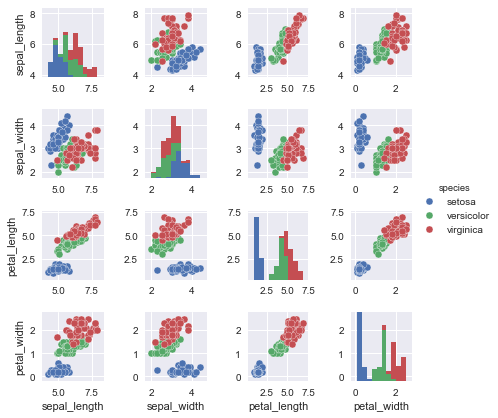

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [3]:
#특징행렬

X_iris = iris.drop('species', axis=1)
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
X_iris.shape

(150, 4)

In [6]:
# 대상 배열, 대상백터, Target/Label

y_iris = iris['species']
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [7]:
y_iris.shape

(150,)

sklearn의 Estimator API

(1) 일관성 - 모든 객체는 일관된 문서를 갖춘 제한된 메서드 집합에서 비롯된 공통 IF를공유
(2) Inspection - 모든 지정된 parameter 값은 공개 속성으로 노출된다
(3) 제한된 객체 계층 구조 - 
    알고리즘은 파이썬 클래스로
    데이터 세트는 Numpy 혹은 Pandas 혹은 Scipy로
    매개 변수명은 표준 파이썬 문자열로
(4) 구성 - 기본 알고리즘은 시퀀스로 구성
(5) 합리적인 기본값 - 모델이 사용자 parameter를 필요로 할때 라이브러리가 적절한 기본값을 정의함

sklearn의 Estimator API 기초

(1) sklearn 으로 부터 적절한 Estimator 클래스를 임포트해서 모델의 클래스를 선택
(2) 클래스를 원하는 값으로 인스턴트화 해서 hyperparameters를 선택
(3) 데이터를 특징 행렬과 대상 벡터로 배치
(4) 모델 인스턴스의 fit() 메서드를 호출해서 모델을 데이터에 적합
(5) 모델을 새 데이터에 적용
   - 지도학습의 경우, 대체로 predict()로 데이터에 대한 레이블을 예측
   - 비지도학습의 경우, 대체로 transform() 이나 predict()로 데이터의 속성을 변환하거나 추론 


지도 학습 예제: 간단한 선형회귀

In [8]:
import matplotlib.pyplot as plt
import numpy as np

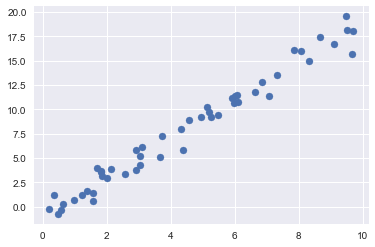

In [9]:
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x - 1 + rng.randn(50)
plt.scatter(x,y);

In [10]:
# 1. 모델 클래스 선택

from sklearn.linear_model import LinearRegression

2. hyperparameter를 선택한다

중요한 점은 모델 클래스가 모델 인스턴스와 같지는 않다는 것이다
모델 클래스를 선택하였어도 몇 가지 선택할 옵션은 남아 있다.

- 오프셋(즉 절편)을 설절할 것인가?
- 모델을 정규화 할 것인가?
- 모델의 유연성을 높이기 위해 특징을 사전처리 할 것인가?
- 모델에서 어느 정도의 정규화를 사용할 것인가?
- 얼마나 많은 모델 성분을 사용할 것인가?

In [11]:
# 모델에 fit_intercept hyperparameter를 사용해 절편을 적합시키자

model = LinearRegression(fit_intercept=True)
model

# sklearn은 모델을 선정하는 것과 모델을 데이터에 적용하는 것을 명확히 구분함
# 아래에서 볼 수 있듯이 아직 어떠한 네이터도 아직 적용 되지 않았다

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Init signature: LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
Docstring:     
Ordinary least squares Linear Regression.

Parameters
----------
fit_intercept : boolean, optional, default True
    whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (e.g. data is expected to be already centered).

normalize : boolean, optional, default False
    This parameter is ignored when ``fit_intercept`` is set to False.
    If True, the regressors X will be normalized before regression by
    subtracting the mean and dividing by the l2-norm.
    If you wish to standardize, please use
    :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
    an estimator with ``normalize=False``.

copy_X : boolean, optional, default True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, optional, default 1
    The number of jobs to use for the computation.
    If -1 all CPUs are used. This will only provide speedup for
    n_targets > 1 and sufficient large problems.

Attributes
----------
coef_ : array, shape (n_features, ) or (n_targets, n_features)
    Estimated coefficients for the linear regression problem.
    If multiple targets are passed during the fit (y 2D), this
    is a 2D array of shape (n_targets, n_features), while if only
    one target is passed, this is a 1D array of length n_features.

intercept_ : array
    Independent term in the linear model.

Notes
-----
From the implementation point of view, this is just plain Ordinary
Least Squares (scipy.linalg.lstsq) wrapped as a predictor object.
File:           c:\users\jsong\anaconda3\lib\site-packages\sklearn\linear_model\base.py
Type:           ABCMeta

In [13]:
# 3.데이터를 특징 행렬과 대상 벡터로 배치한다.

X = x[:, np.newaxis]
X

array([[ 3.74540119],
       [ 9.50714306],
       [ 7.31993942],
       [ 5.98658484],
       [ 1.5601864 ],
       [ 1.5599452 ],
       [ 0.58083612],
       [ 8.66176146],
       [ 6.01115012],
       [ 7.08072578],
       [ 0.20584494],
       [ 9.69909852],
       [ 8.32442641],
       [ 2.12339111],
       [ 1.81824967],
       [ 1.8340451 ],
       [ 3.04242243],
       [ 5.24756432],
       [ 4.31945019],
       [ 2.9122914 ],
       [ 6.11852895],
       [ 1.39493861],
       [ 2.92144649],
       [ 3.66361843],
       [ 4.56069984],
       [ 7.85175961],
       [ 1.99673782],
       [ 5.14234438],
       [ 5.92414569],
       [ 0.46450413],
       [ 6.07544852],
       [ 1.70524124],
       [ 0.65051593],
       [ 9.48885537],
       [ 9.65632033],
       [ 8.08397348],
       [ 3.04613769],
       [ 0.97672114],
       [ 6.84233027],
       [ 4.40152494],
       [ 1.22038235],
       [ 4.9517691 ],
       [ 0.34388521],
       [ 9.09320402],
       [ 2.58779982],
       [ 6

In [14]:
# 4. 모델에 데이터를 적용하자

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

fit() 명령어에는 모델에 종속된 여러가지 내부 계산이 뒤따른다.
여기서는 아래의 Attributes 를 탐색할 수 있다.
----------
coef_ : array, shape (n_features, ) or (n_targets, n_features)
    Estimated coefficients for the linear regression problem.
    If multiple targets are passed during the fit (y 2D), this
    is a 2D array of shape (n_targets, n_features), while if only
    one target is passed, this is a 1D array of length n_features.

intercept_ : array
    Independent term in the linear model.

In [15]:
model.coef_ # 기울기가 2에 가깝고

array([ 1.9776566])

In [16]:
model.intercept_ # 절편이 -1에 가까운 

-0.90331072553111635

In [17]:
# 5. 알려 지지 않은 데이터 예측하기

xfit = np.linspace(-1, 11)
xfit

array([ -1.        ,  -0.75510204,  -0.51020408,  -0.26530612,
        -0.02040816,   0.2244898 ,   0.46938776,   0.71428571,
         0.95918367,   1.20408163,   1.44897959,   1.69387755,
         1.93877551,   2.18367347,   2.42857143,   2.67346939,
         2.91836735,   3.16326531,   3.40816327,   3.65306122,
         3.89795918,   4.14285714,   4.3877551 ,   4.63265306,
         4.87755102,   5.12244898,   5.36734694,   5.6122449 ,
         5.85714286,   6.10204082,   6.34693878,   6.59183673,
         6.83673469,   7.08163265,   7.32653061,   7.57142857,
         7.81632653,   8.06122449,   8.30612245,   8.55102041,
         8.79591837,   9.04081633,   9.28571429,   9.53061224,
         9.7755102 ,  10.02040816,  10.26530612,  10.51020408,
        10.75510204,  11.        ])

In [19]:
# 앞에서 처럼 이 x 값을 [n_samples, n_features]의 특징 행렬의 형태로 맞추어야 한다.

Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
yfit

array([ -2.88096733,  -2.39664326,  -1.9123192 ,  -1.42799513,
        -0.94367106,  -0.459347  ,   0.02497707,   0.50930113,
         0.9936252 ,   1.47794926,   1.96227333,   2.44659739,
         2.93092146,   3.41524552,   3.89956959,   4.38389366,
         4.86821772,   5.35254179,   5.83686585,   6.32118992,
         6.80551398,   7.28983805,   7.77416211,   8.25848618,
         8.74281024,   9.22713431,   9.71145837,  10.19578244,
        10.68010651,  11.16443057,  11.64875464,  12.1330787 ,
        12.61740277,  13.10172683,  13.5860509 ,  14.07037496,
        14.55469903,  15.03902309,  15.52334716,  16.00767122,
        16.49199529,  16.97631936,  17.46064342,  17.94496749,
        18.42929155,  18.91361562,  19.39793968,  19.88226375,
        20.36658781,  20.85091188])

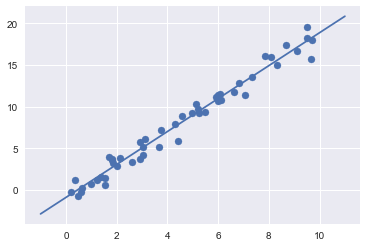

In [23]:
# 원시 데이터를 먼저 플로팅하고 이 모델 적합을 플로팅해서 시각해 해 보자

plt.scatter(x,y)
plt.plot(xfit, yfit);

지도 학습 예제: 붓꽃 분류

가우스 나이브 베이즈(Gaussian Naive Bayes)를 적용해보자
이 모델은 각 클래스가 가우스 분포로 정렬된 축으로 되어 있다 가정하는데...
처리 속도가 아주 빠르고 hyperparameter를 설정할 필요가 없어 기본 분류로 상용하는데 아주 유용함
더 정교한 모델로 가기전에 사용해 보면 좋다

In [24]:
# 훈련 자료와 테스트 자료로 데이터 나누기
# train_test_split() 함수를 사용**

from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [25]:
Xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5


In [26]:
Xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [27]:
ytrain.head()

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [28]:
ytest.head()

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
Name: species, dtype: object

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

.. deprecated:: 0.18
    This module will be removed in 0.20.
    Use :func:`sklearn.model_selection.train_test_split` instead.

Quick utility that wraps input validation and
``next(iter(ShuffleSplit(n_samples)))`` and application to input
data into a single call for splitting (and optionally subsampling)
data in a oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int, or None (default is None)
    If float, should be between 0.0 and 1.0 and represent the
    proportion of the dataset to include in the test split. If
    int, represents the absolute number of test samples. If None,
    the value is automatically set to the complement of the train size.
    If train size is also None, test size is set to 0.25.

train_size : float, int, or None (default is None)
    If float, should be between 0.0 and 1.0 and represent the
    proportion of the dataset to include in the train split. If
    int, represents the absolute number of train samples. If None,
    the value is automatically set to the complement of the test size.

random_state : int, RandomState instance or None, optional (default=None)
    If int, random_state is the seed used by the random number generator;
    If RandomState instance, random_state is the random number generator;
    If None, the random number generator is the RandomState instance used
    by `np.random`.

stratify : array-like or None (default is None)
    If not None, data is split in a stratified fashion, using this as
    the labels array.

    .. versionadded:: 0.17
       *stratify* splitting

Returns
-------
splitting : list, length = 2 * len(arrays),
    List containing train-test split of inputs.

    .. versionadded:: 0.16
        If the input is sparse, the output will be a
        ``scipy.sparse.csr_matrix``. Else, output type is the same as the
        input type.

Examples
--------
>>> import numpy as np
>>> from sklearn.cross_validation import train_test_split
>>> X, y = np.arange(10).reshape((5, 2)), range(5)
>>> X
array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])
>>> list(y)
[0, 1, 2, 3, 4]

>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
...
>>> X_train
array([[4, 5],
       [0, 1],
       [6, 7]])
>>> y_train
[2, 0, 3]
>>> X_test
array([[2, 3],
       [8, 9]])
>>> y_test
[1, 4]
File:      c:\users\jsong\anaconda3\lib\site-packages\sklearn\cross_validation.py
Type:      function

In [30]:
from sklearn.naive_bayes import GaussianNB # 1 모델 클래스 선택
model = GaussianNB()                       # 2 모델 인스턴스화
model.fit(Xtrain, ytrain)                  # 3 모델에 데이터 적용
y_model = model.predict(Xtest)             # 4 새로운 데이터로 예측하기
y_model

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'],
      dtype='<U10')

In [31]:
# 마지막으로 accurcy_score를 통하여 예측하 레이블 중 실제값과 일치하는 비율이 얼마인지 확인

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

# 정확도가 97%가 넘으니 이 특정 데이터 세트에 효과적이다.

0.97368421052631582

비지도학습: 붓꽃 데이터 차원 축소 방법

붓꽃 데이터는 4차원 인데... 
이를 PCA(principle component analysis)를 통하여 2차원 즉 2개의 성분으로 반환해 보자

In [33]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

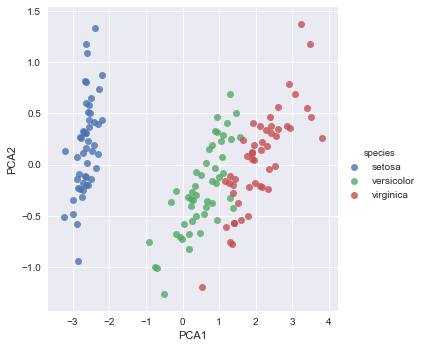

In [34]:
# 결과를 플로팅해 보자
# 결과를 원래의 붓꽃 DataFrame에 삽입하고 Seaborn의 Implot를 사용하자

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

# 앞에서 본 봐와 같이 비교적 단순한 분류 기법이 이 데이터 세트에는 효과적임

비지도 학습: 붓꽃 군집화

강력한 군집화 기법인 GMM(Gaussian Mixture Model)을 사용하자.
GMM은 데이터를 Gaussian blob의 컬렉션으로 모델링 한다

In [35]:
from sklearn.mixture import GMM
model = GMM(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

C:\Users\jsong\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jsong\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jsong\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\jsong\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

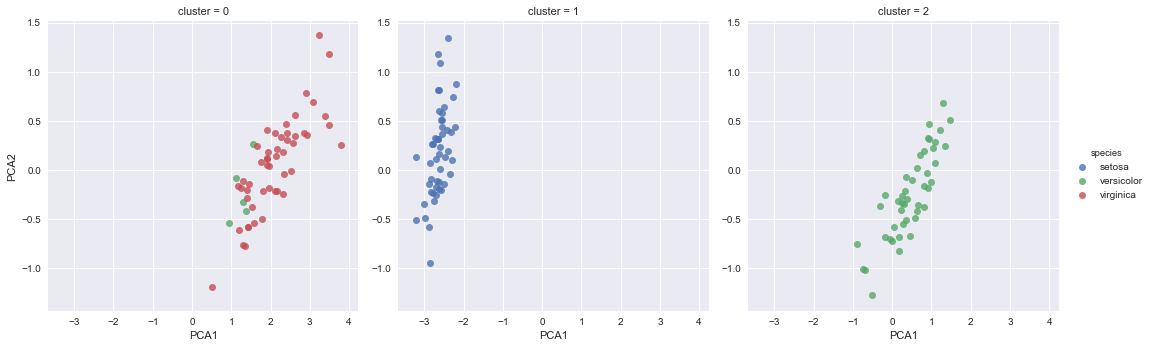

In [36]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

setosa 종은 완벽히 분류 되었음을 알 수 있는데...
versicolor 와 virginica는 서로 약간 섞여 있음을 알 수 있다.
해당 분야 전문가에게 관찰 중인 표본간의 관계에 대한 단서를 제공하여 줄 수 있다

응용: 손으로 쓴 숫자 탐색하기

In [37]:
# 숫자 데이터 적재 및 시각화

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape # 3차원 배열로 1,797개의 표본을 가진 8x8 픽셀로 구성

(1797, 8, 8)

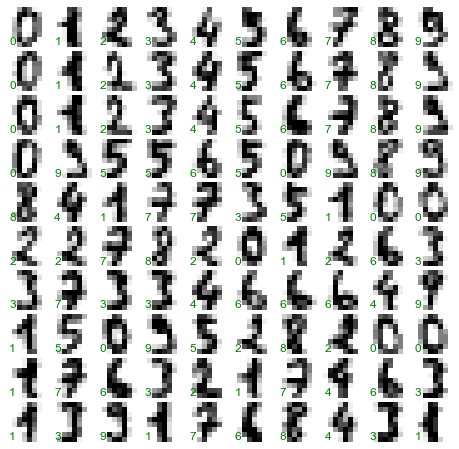

In [40]:
# 처음 100개를 시각화 해보자

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
       ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
       ax.text(0.05, 0.05, str(digits.target[i]),
              transform=ax.transAxes, color='green')
    

In [41]:
# 특징행렬 정의

X = digits.data
X.shape

(1797, 64)

In [42]:
y = digits.target
y.shape

(1797,)

비지도 학습: 차원 축소

64차원 모수 공간에 대한 점을 시각화 하는 것은 매우 어렵다
차원을 2차원으로 줄이는데... 
여기서는 Isomap(등거리 사상)이라는 다양체 학습 알고리즘(manifold learning)을 사용한다.

In [44]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

C:\Users\jsong\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


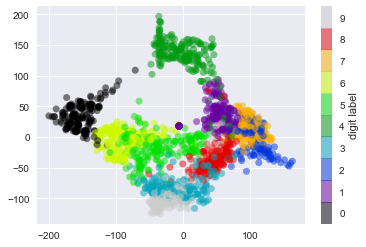

In [46]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

그림 해석:

0(검은색)과 1(보라색)은 모수 공간에서 거의 겹치지 않는다 => 0은 이미지의 가운데가 비어 있지만 1은 가운데가 없다

반면 1과 4(초록색)는 거의 연속적인 스펙트럼을 가진 것처럼 보인다.
1을 쓸 때 위에 모자를 다는 사람이 많아 4와 비슷해 보일 수 있다.

In [47]:
# 숫자 분류-GMM 활용

# 우선 훈련 자료와 테스트 자료를 나누자

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

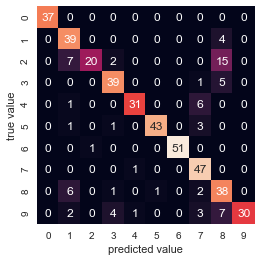

In [49]:
# 오차 행렬(confusion matrix) == 어디서 제대로 예측을 못했는지 알아 보는 방법

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

그림 해석:

2가 가장 많이 1이나 8로 오분류 됨

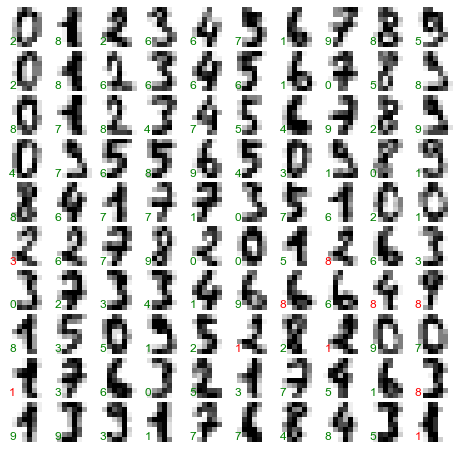

In [50]:
# 다른 방법으로 오차 알아 보기

fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
       ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
       ax.text(0.05, 0.05, str(y_model[i]),
              transform=ax.transAxes, 
              color='green' if (ytest[i] == y_model[i]) else 'red')